### Image Recognition using CNN

- Used Dataset of Cats and Dogs

###### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

###### Dataset Directories

In [3]:
trainDir = 'datasets/train/'
testDir = 'datasets/test/'
valDir = 'datasets/validation/'

###### Data Preprocessing

- Reading the Picture.
- Decode JPEG to RGB Pixels.
- Converting into tensor.
- Rescaling the pixel values to the [0, 1] interval.

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
# Generating batches of tensors using image data

trainDataGen = ImageDataGenerator(rescale=1./255) 
testDataGen = ImageDataGenerator(rescale=1./255)

# Train Data Generation
trainGenerator = trainDataGen.flow_from_directory(
        trainDir,
        target_size=(150, 150), # size of images, that we want [Standardizing images]
        batch_size=20,
        class_mode='binary')

# Test Data Generation
valGenerator = testDataGen.flow_from_directory(
        valDir,
        target_size=(150, 150), # size of images, that we want [Standardizing images]
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers

###### Model Structure

In [8]:
model = models.Sequential()

# 5 Convolution layers with maxpooling
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten Layer
model.add(layers.Flatten())

# Dense Layer
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(512, activation='relu'))

# Output Dense Layer
model.add(layers.Dense(1, activation='relu'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

###### Training Model

In [10]:
from tensorflow.keras import optimizers

In [12]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=0.004), metrics=['acc'])

In [15]:
history = model.fit_generator(trainGenerator, steps_per_epoch=100, epochs=20, validation_data=valGenerator, validation_steps=50)

D:\Programming\Python\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 [==============================] - 115s 1s/step - loss: 7.6974 - acc: 0.5010 - val_loss: 7.7125 - val_acc: 0.5000
Epoch 2/20
100/100 [==============================] - 89s 888ms/step - loss: 7.8902 - acc: 0.4885 - val_loss: 7.7125 - val_acc: 0.5000
Epoch 3/20
100/100 [==============================] - 88s 883ms/step - loss: 7.4552 - acc: 0.5167 - val_loss: 7.7125 - val_acc: 0.5000
Epoch 4/20
100/100 [==============================] - 89s 889ms/step - loss: 7.6461 - acc: 0.5043 - val_loss: 7.7125 - val_acc: 0.5000
Epoch 5/20
100/100 [==============================] - 89s 895ms/step - loss: 7.7884 - acc: 0.4951 - val_loss: 7.7125 - val_acc: 0.5000
Epoch 6/20
100/100 [==============================] - 88s 885ms/step - loss: 7.8063 - acc: 0.4939 - val_loss: 7.7125 - val_acc: 0.5000
Epoch 7/20
100/100 [==============================] - 88s 881ms/step - loss: 8.0049 - acc: 0.4810 - val_loss: 7.7125 - val_acc: 0.5000
Epoch 8/20
100/100 [==============================] - 88s

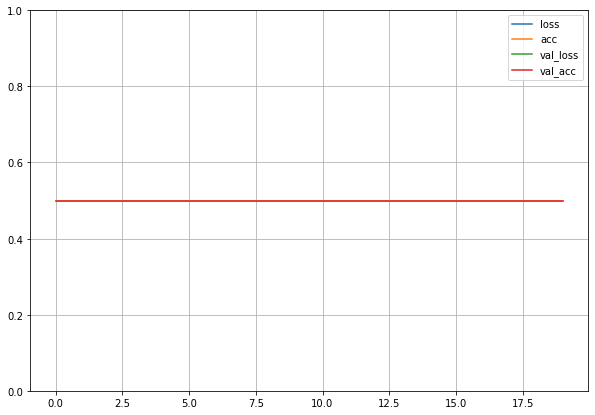

In [16]:
pd.DataFrame(history.history).plot(figsize = (10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [17]:
model.save('model.h5')